# llc4320 drifters spectra: Lagrangian vs Eulerian

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import pyplot as plt
from cmocean import cm
import matplotlib.colors as colors

import mitequinox.utils as ut
import mitequinox.parcels as pa
import mitequinox.drifters as dr

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.6022020.datarmor0/parcels-502027/libparcels_random_7b9c3b28-79a3-46cf-994b-10d81d014594.so


In [2]:
if True:
    from dask.distributed import Client, LocalCluster
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster()
    cluster = PBSCluster(cores=28, processes=14) # necessary?
    w = cluster.scale(jobs=1)
    # 3 needed for lagrangian lon/lat binning
    # 15 for eulerian binning
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

In [4]:
client

Client Scheduler: tcp://10.148.0.253:44445 Dashboard: http://10.148.0.253:8787/status,Cluster Workers: 14 Cores: 28 Memory: 111.72 GiB


______________
## lat*lon maps

In [66]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_extra_T365j_dt1j_dij50'
p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])

In [67]:
E = p.load_diagnostic('spectra_uv_T60_mean0_lat_lon.zarr')
E_L = E.E
E_L

<xarray.DataArray 'E' (lon_bins: 359, lat_bins: 119, frequency: 1440)>
dask.array<open_dataset-2366582abcbbe28e7eebd8a23811eafcE, shape=(359, 119, 1440), dtype=float64, chunksize=(359, 60, 100), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
  * lon_bins   (lon_bins) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5

In [68]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat_lon.zarr'))
E_Eulerian = (E_Eulerian.rename({'lat':'lat_bins', 'lon': 'lon_bins', 'freq_time': 'frequency'}))
E_E = E_Eulerian.E_SSUV
E_E

<xarray.DataArray 'E_SSUV' (frequency: 1440, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-bb1cb0757f2115e2d668c88b83d98e55E_SSUV, shape=(1440, 359, 119), dtype=float64, chunksize=(180, 45, 30), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
  * lon_bins   (lon_bins) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5

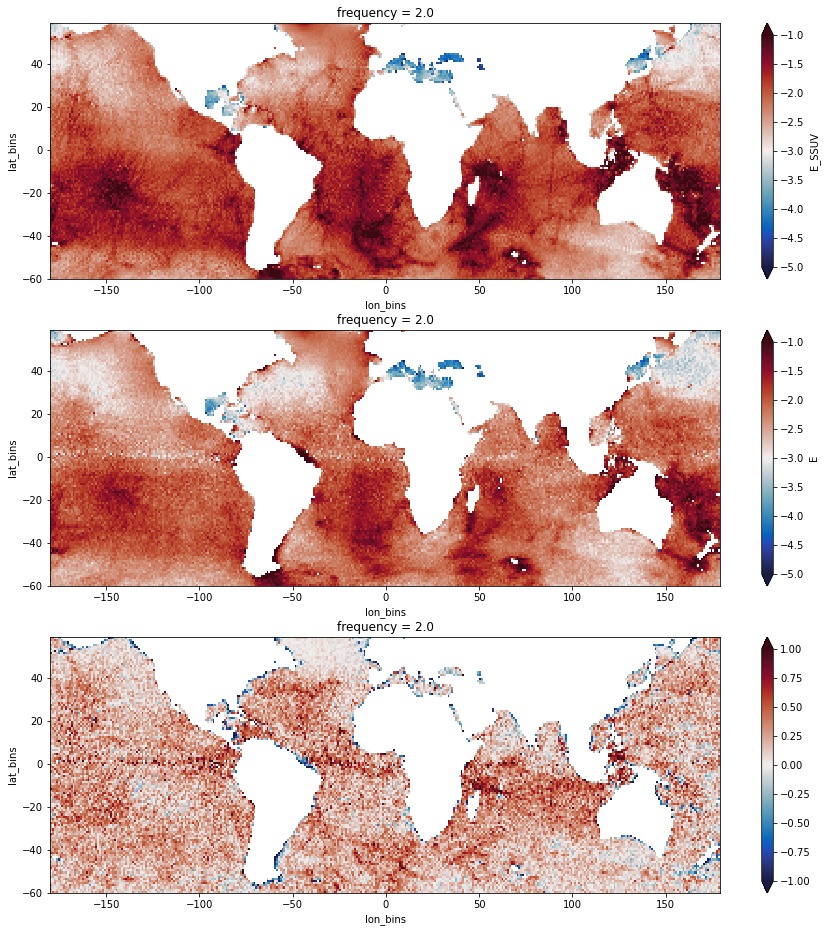

In [9]:
# load spectra
fig, ax = plt.subplots(figsize=(15,16))
ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)

(-10.0, 10.0)

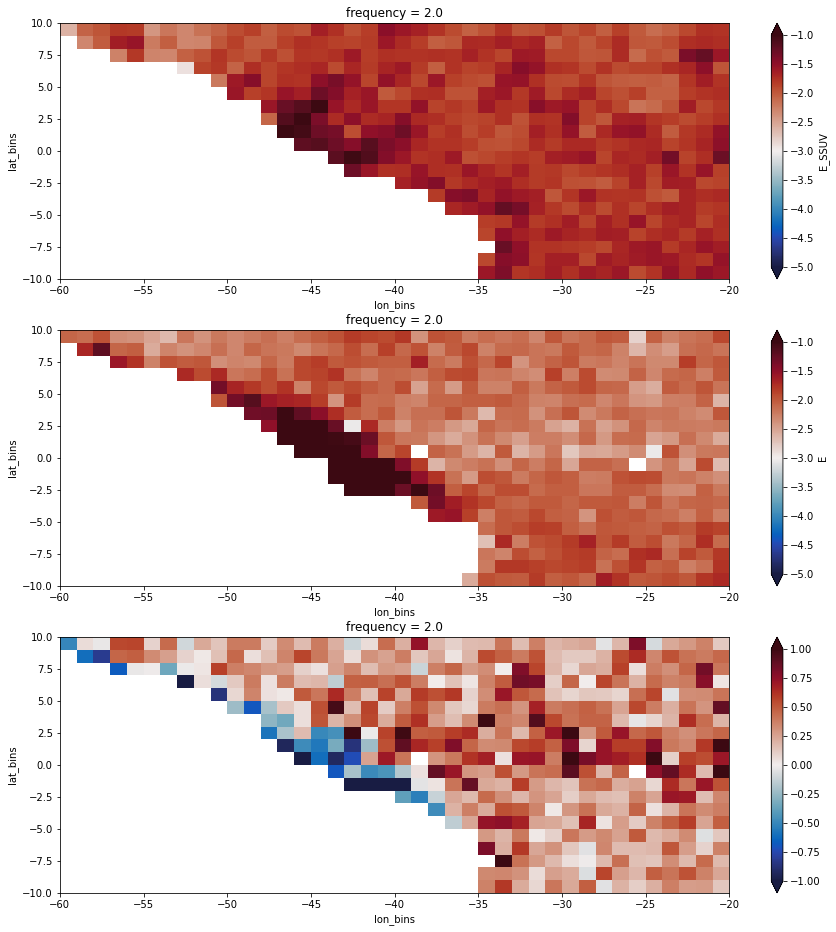

In [35]:
# load spectra
fig, ax = plt.subplots(figsize=(15,16))

ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-60., -20.)
ax.set_ylim(-10., 10.)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-60., -20.)
ax.set_ylim(-10., 10.)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)
ax.set_xlim(-60., -20.)
ax.set_ylim(-10., 10.)

(-12.0, 12.0)

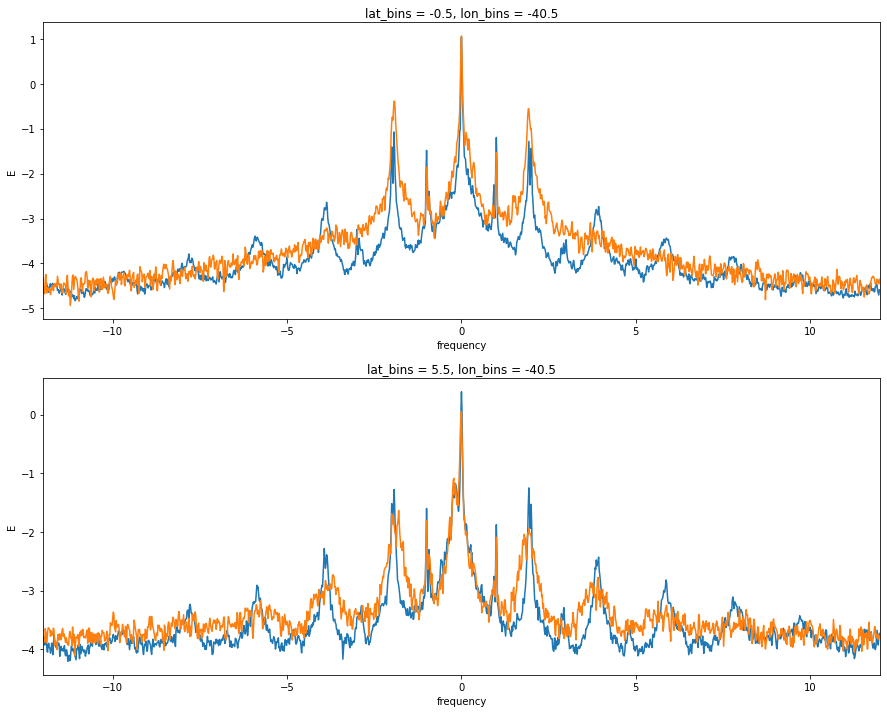

In [12]:
# load spectra
fig, ax = plt.subplots(figsize=(15,12))

ax = plt.subplot(211)
np.log10(E_E.sel(lon_bins=-40.5,lat_bins=-0.5)).plot()
np.log10(E_L.sel(lon_bins=-40.5,lat_bins=-0.5)).plot()
ax.set_xlim(-12., 12.)

ax = plt.subplot(212)
np.log10(E_E.sel(lon_bins=-40.5,lat_bins=5.5)).plot()
np.log10(E_L.sel(lon_bins=-40.5,lat_bins=5.5)).plot()
ax.set_xlim(-12., 12.)

(-60.0, -30.0)

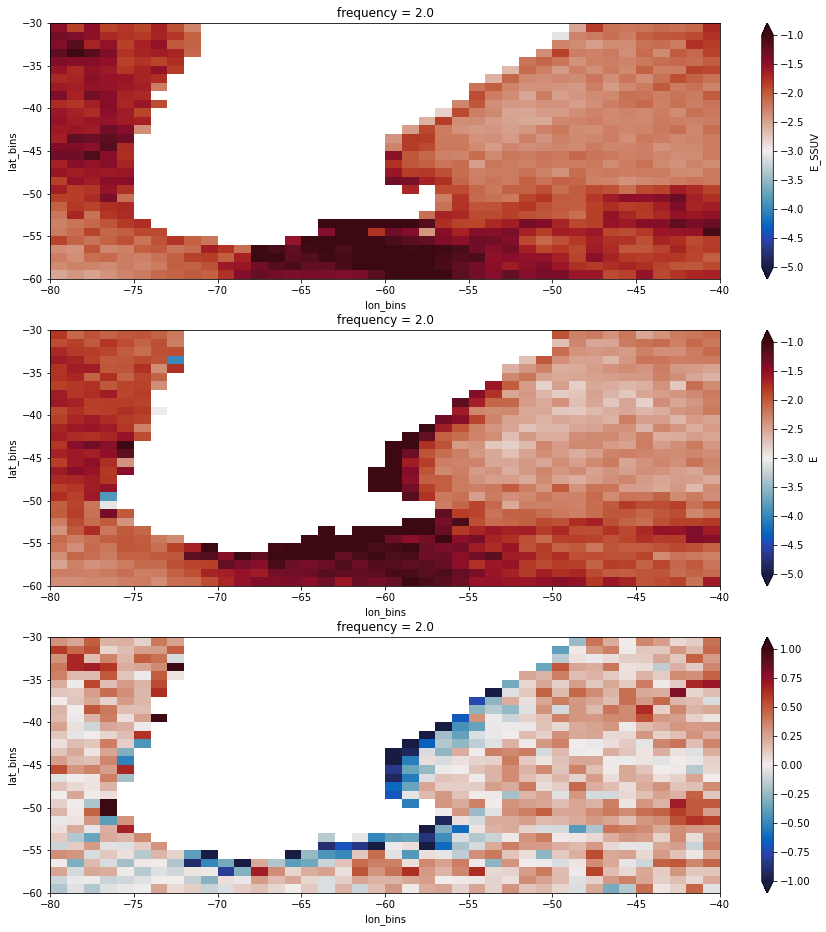

In [54]:
# load spectra
fig, ax = plt.subplots(figsize=(15,16))

ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-80., -40.)
ax.set_ylim(-60., -30.)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-80., -40.)
ax.set_ylim(-60., -30.)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)
ax.set_xlim(-80., -40.)
ax.set_ylim(-60., -30.)


(-4.0, 4.0)

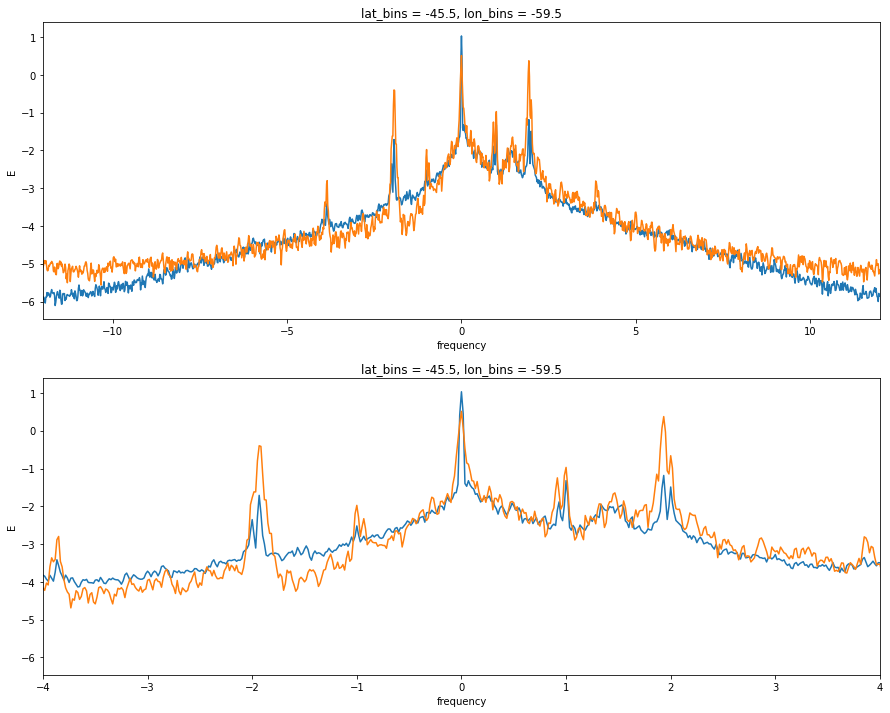

In [17]:
# load spectra
fig, ax = plt.subplots(figsize=(15,12))

ax = plt.subplot(211)
np.log10(E_E.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
np.log10(E_L.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
ax.set_xlim([-12.,12.])

ax = plt.subplot(212)
np.log10(E_E.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
np.log10(E_L.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
ax.set_xlim(-4., 4.)

In [53]:
ds_L_bin = (p.load_diagnostic('spectra_uv_T60_mean0_lat_from_2Dbinned_spectra.zarr')
            .rename({'E':'E_Lagrangian'})
           )
ds_L_bin
E_L_bin = ds_L_bin.E_Lagrangian
E_L_bin

<xarray.DataArray 'E_Lagrangian' (lat_bins: 119, frequency: 1440)>
dask.array<open_dataset-951c6fd3ca6a5801374347329b4115d6E, shape=(119, 1440), dtype=float64, chunksize=(60, 100), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5

In [54]:
E_L_bin_uv_mean = (E_L_bin.where(E_L_bin.lat_bins>0)).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = (E_L_bin.where(E_L_bin.lat_bins<0)).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = E_L_bin_uv_mean_2.assign_coords(frequency=E_L_bin_uv_mean_2.frequency * -1.)

In [69]:
E_E_uv_mean = (E_E.where(E_E.lat_bins>0)).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = (E_E.where(E_E.lat_bins<0)).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = E_E_uv_mean_2.assign_coords(frequency=E_E_uv_mean_2.frequency * -1.)

E_L_uv_mean = (E_L.where(E_L.lat_bins>0)).mean(dim=('lat_bins','lon_bins'))
E_L_uv_mean_2 = (E_L.where(E_L.lat_bins<0)).mean(dim=('lat_bins','lon_bins'))
E_L_uv_mean_2 = E_L_uv_mean_2.assign_coords(frequency=E_L_uv_mean_2.frequency * -1.)

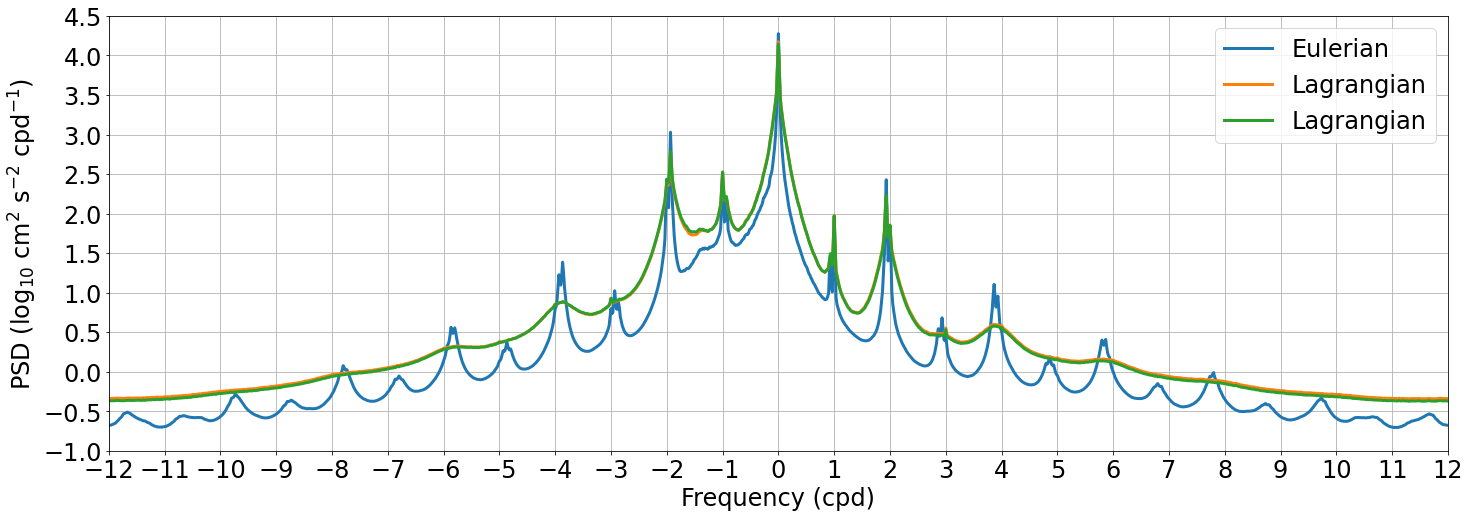

In [70]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=3)
(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=3)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_ylim([-1,4.5])
ax.set_yticks([-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_global_mean.png')

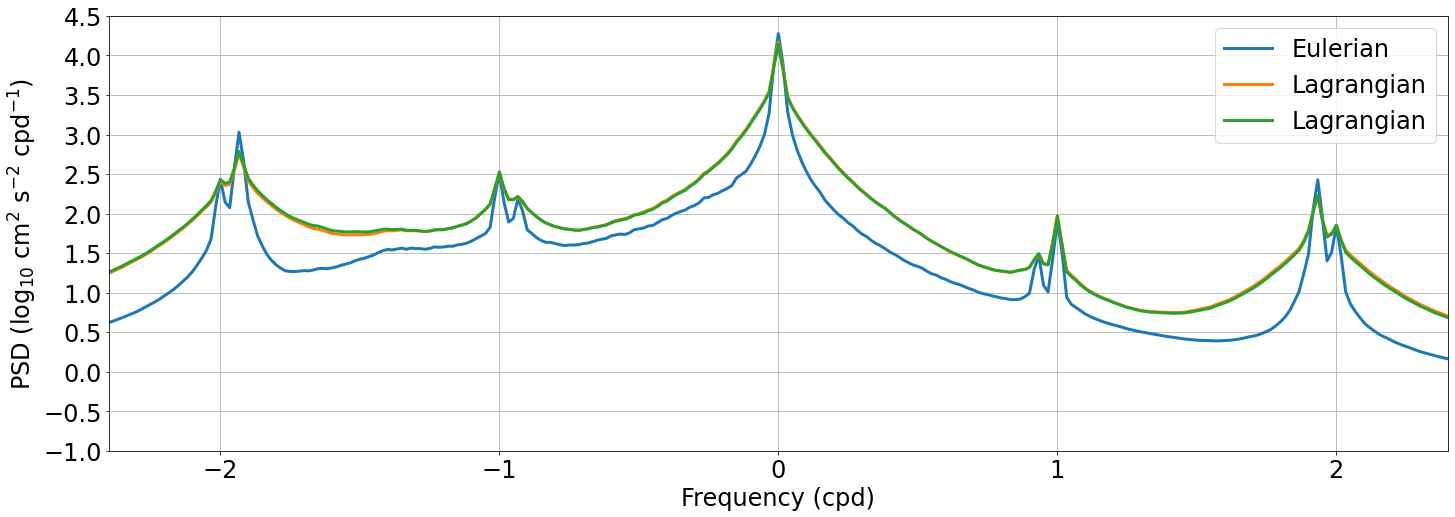

In [72]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=3)
(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=3)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-2.4,2.4])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([-1,4.5])
ax.set_yticks([-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_global_mean_zoomin.png')

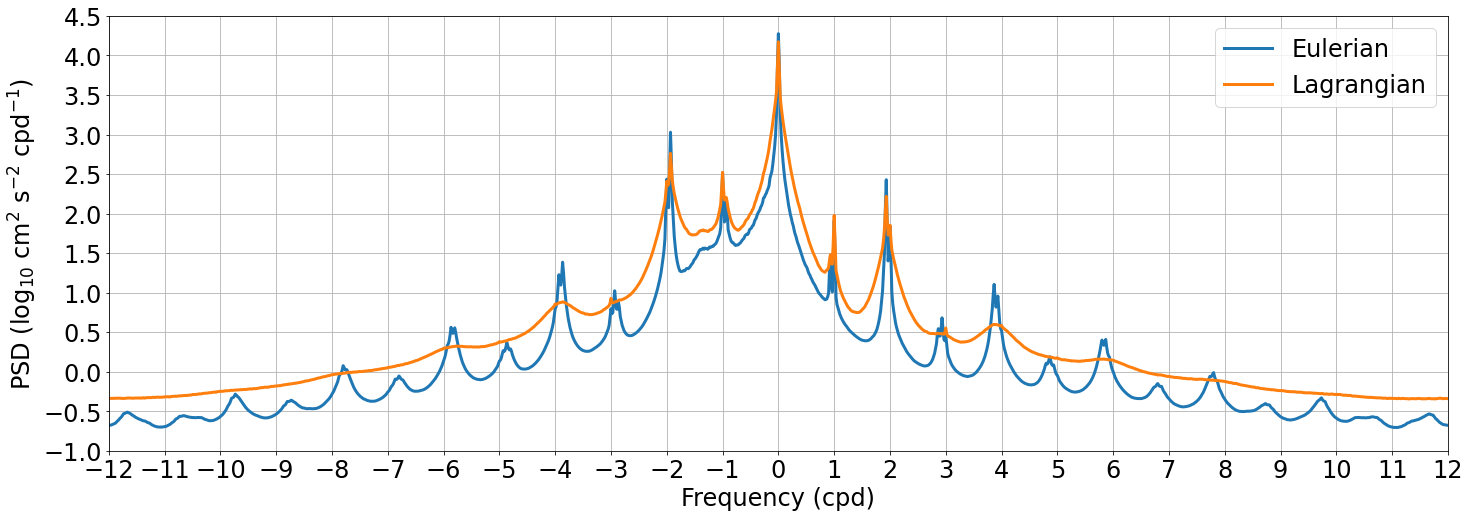

In [15]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=3)
(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_ylim([-1,4.5])
ax.set_yticks([-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_global_mean.png')

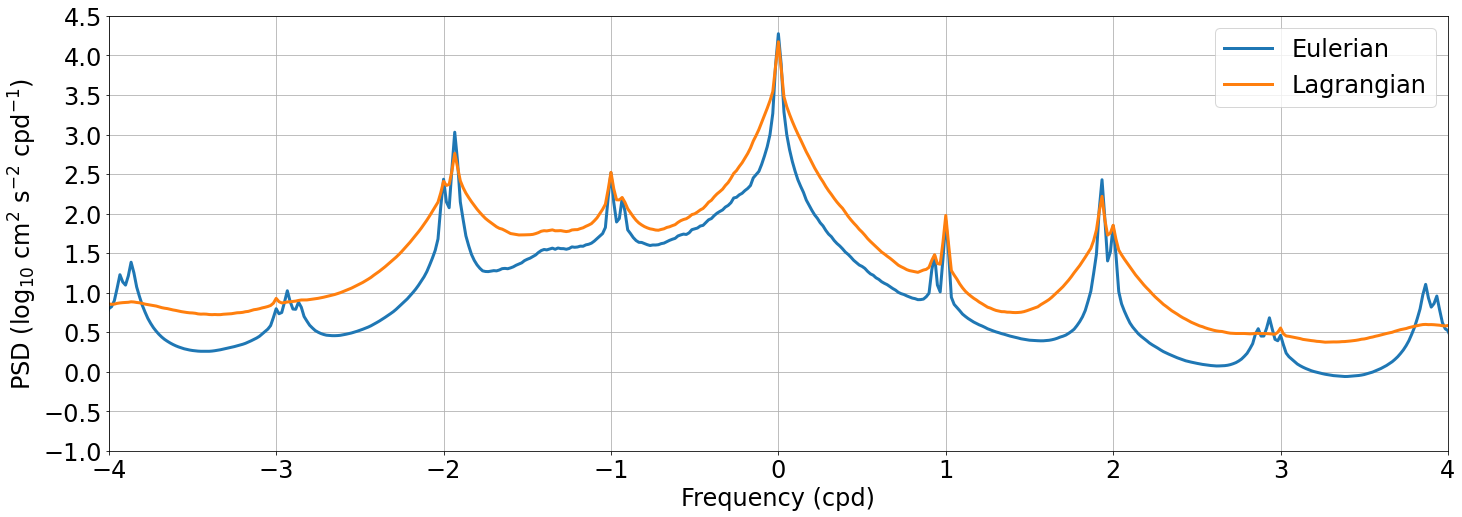

In [16]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=3)
(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-4.,4.])
ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([-1,4.5])
ax.set_yticks([-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_comparison_global_mean_zoomin.png')

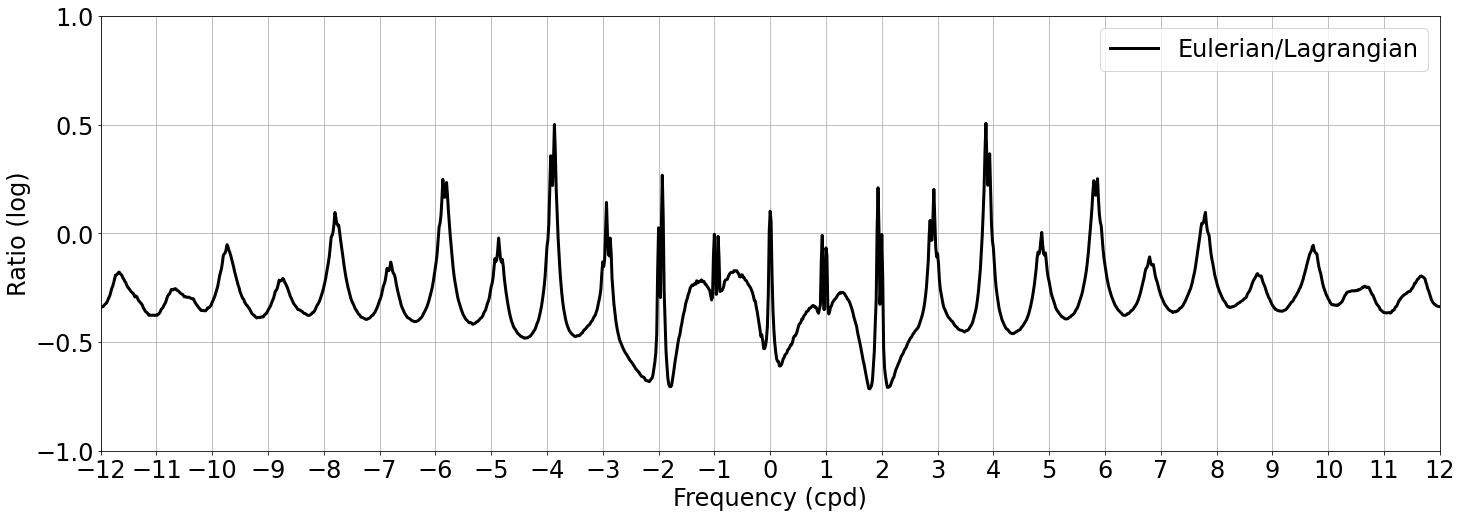

In [91]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian/Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)/(E_L_uv_mean+E_L_uv_mean_2))).plot(ax=ax,color='black', label=labels[0],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_ylim([-1,1])
ax.set_yticks([-1,-0.5, 0., 0.5, 1.])
ax.legend(prop={'size': 24})
ax.set_ylabel('Ratio (log)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

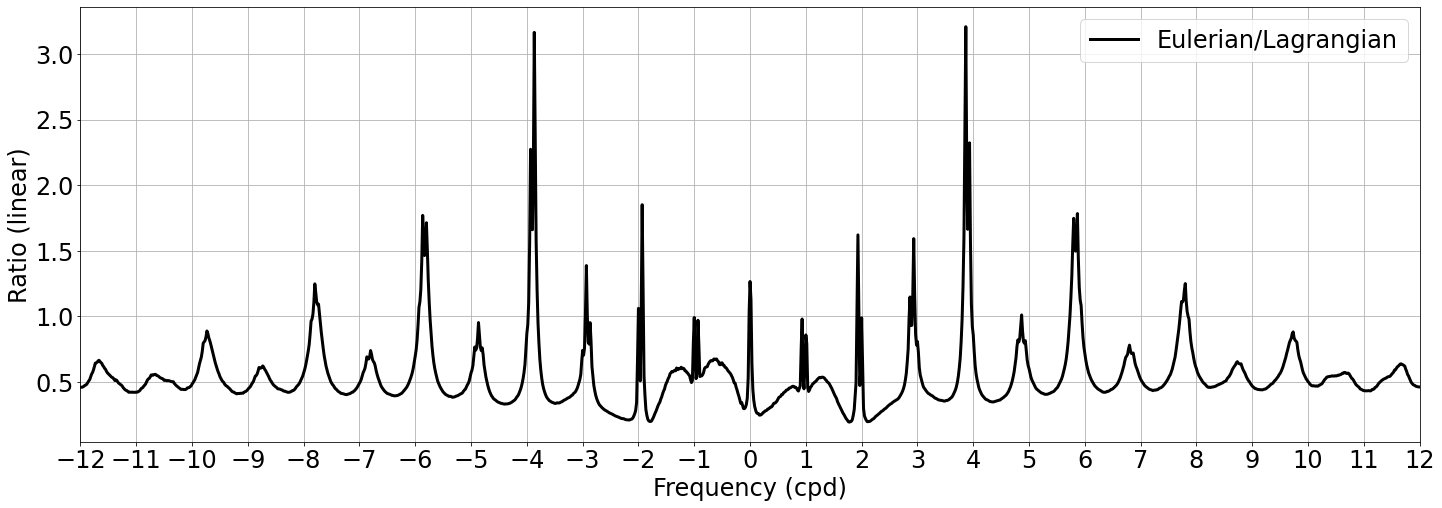

In [92]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian/Lagrangian']
(((E_E_uv_mean+E_E_uv_mean_2)/(E_L_uv_mean+E_L_uv_mean_2))).plot(ax=ax,color='black', label=labels[0],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
#ax.set_ylim([-1,1])
#ax.set_yticks([-1,-0.5, 0., 0.5, 1.])
ax.legend(prop={'size': 24})
ax.set_ylabel('Ratio (linear)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

______________
## lat*lon maps

In [6]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat_lon_bands.zarr'))
E_Eulerian = (E_Eulerian.rename({'lat_bin':'lat_bins', 'lon_bin': 'lon_bins'}))
E_Eulerian

<xarray.Dataset>
Dimensions:         (frequency_band: 14, lat_bins: 119, lon_bins: 359)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5
Data variables:
    E_SSUV          (frequency_band, lon_bins, lat_bins) float64 dask.array<chunksize=(7, 180, 60), meta=np.ndarray>

In [7]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_extra_T365j_dt1j_dij50'

p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])
E_lagrangian = p.load_diagnostic('spectra_uv_T60_mean0_lat_lon_bands.zarr')
E_lagrangian = E_lagrangian.E
E_lagrangian

<xarray.DataArray 'E' (frequency_band: 14, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-6fdd392cb5b38dcff01e01286977fd97E, shape=(14, 359, 119), dtype=float64, chunksize=(1, 359, 60), chunktype=numpy.ndarray>
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5

Text(0.5, 0, '')

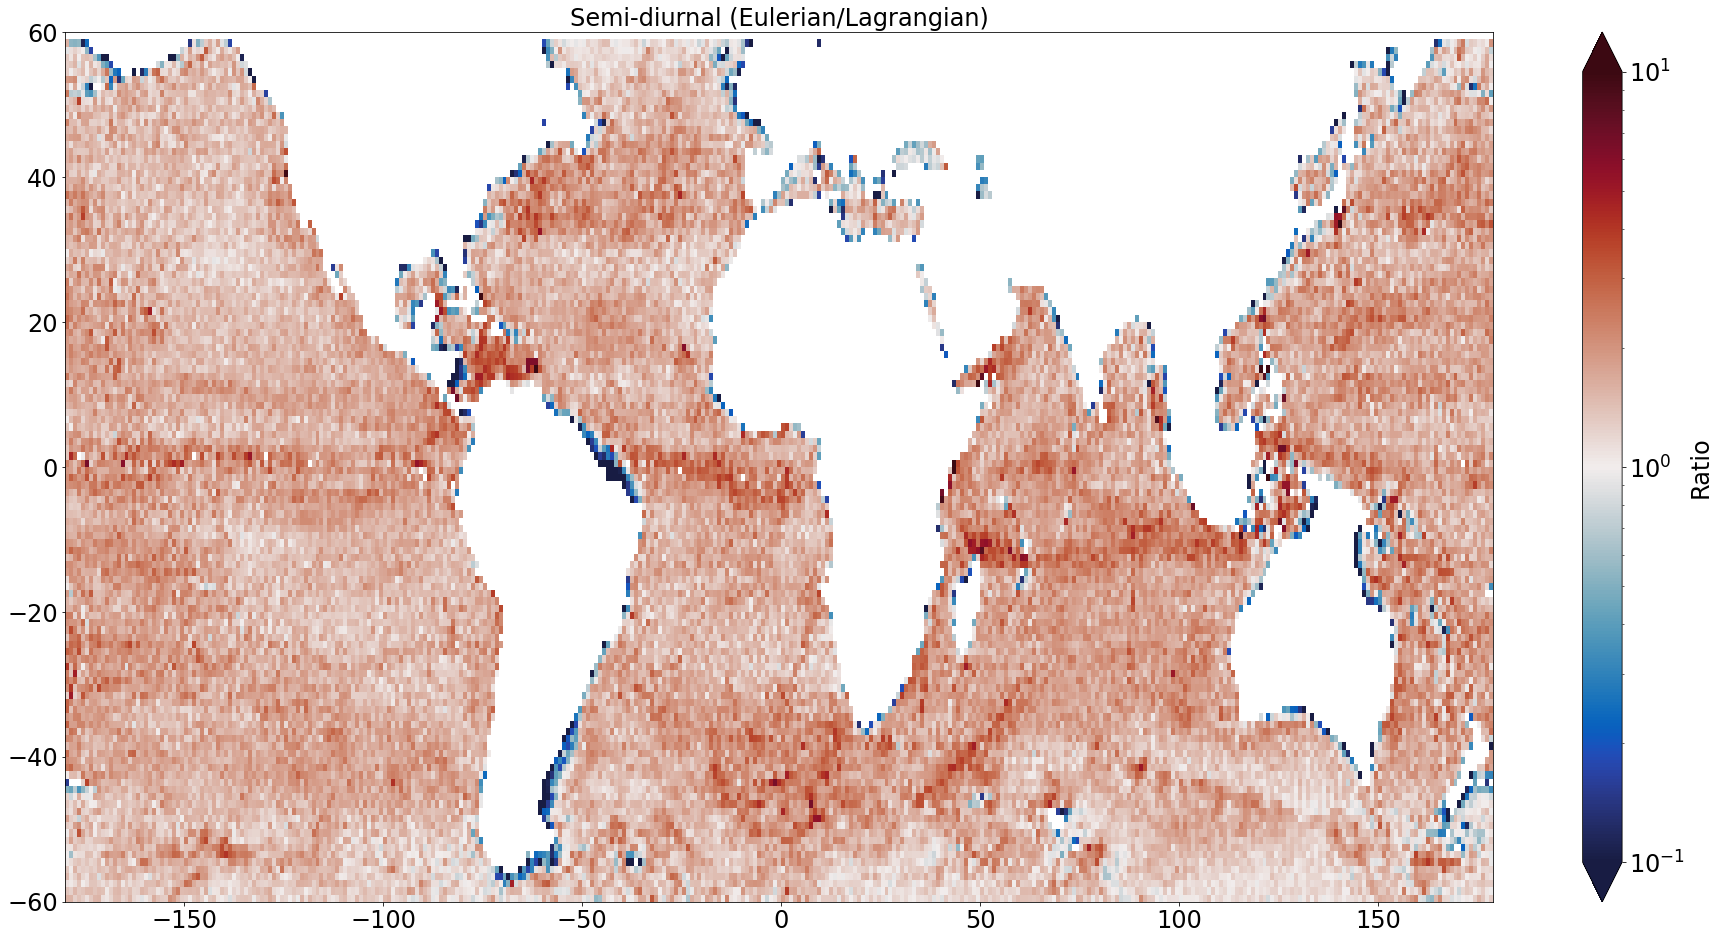

In [31]:
font_size = 24
fig, ax = plt.subplots(figsize=(32,16))

ax = plt.subplot(111)
cax = (E_Eulerian.E_SSUV.sel(frequency_band='semidiurnal_0dot1')/E_lagrangian.sel(frequency_band='semidiurnal_0dot1')).plot(x='lon_bins', y='lat_bins', cmap=cm.balance, norm=colors.LogNorm(vmin=1e-1, vmax=1e1), add_colorbar = False)
cbar = plt.colorbar(cax, ax=ax, extend='both', orientation='vertical')
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Ratio', fontsize=font_size)
#ax.set_xlim(-5., 5.)
ax.set_ylim(-60., 60.)
ax.set_title('Semi-diurnal (Eulerian/Lagrangian)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_ylabel('',fontsize=font_size)
ax.set_xlabel('',fontsize=font_size)


### different bandwidths

In [8]:
E = p.load_diagnostic('spectra_uv_T60_mean0_lat_lon_bands.zarr')
E_L = E.E
E_L

<xarray.DataArray 'E' (frequency_band: 14, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-6fdd392cb5b38dcff01e01286977fd97E, shape=(14, 359, 119), dtype=float64, chunksize=(1, 359, 60), chunktype=numpy.ndarray>
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5

In [9]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat_lon_bands.zarr'))
E_Eulerian = (E_Eulerian.rename({'lat_bin':'lat_bins', 'lon_bin': 'lon_bins'}))
E_E = E_Eulerian.E_SSUV
E_E

<xarray.DataArray 'E_SSUV' (frequency_band: 14, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-a8c40356d724082810d252e9d0b3dff7E_SSUV, shape=(14, 359, 119), dtype=float64, chunksize=(7, 180, 60), chunktype=numpy.ndarray>
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5

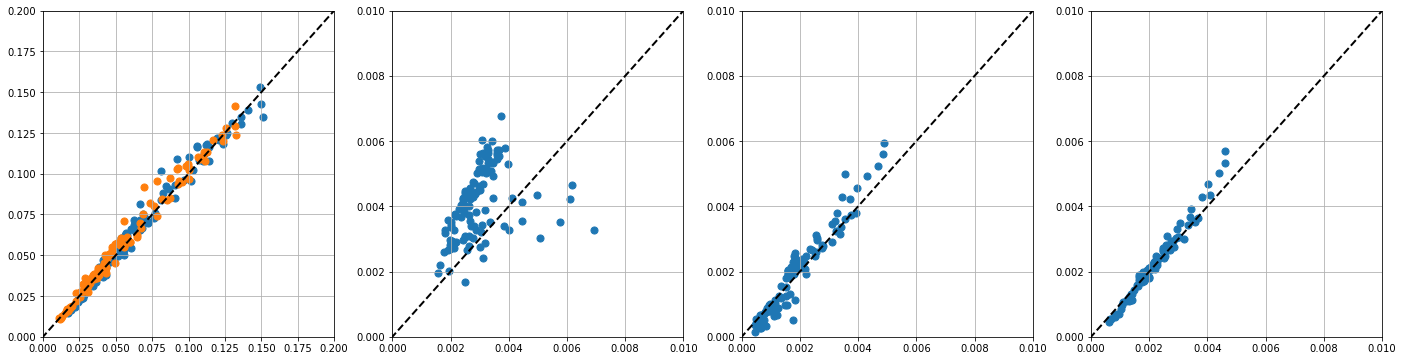

In [66]:
# bandwidth +-0.1 cpd
fig, ax = plt.subplots(1,1,figsize=(24,6))
lims = (-.5, .5)

ax = plt.subplot(141)
ax.scatter( E_L.sel(frequency_band='total').mean('lon_bins'), E_E.sel(frequency_band='total').mean('lon_bins'), s=50)
ax.scatter( E_L.sel(frequency_band='low').mean('lon_bins'), E_E.sel(frequency_band='low').mean('lon_bins'), s=50)
ax.grid(); ax.set_xlim(0.,0.2); ax.set_ylim(0.,0.2)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(142)
ax.scatter( E_L.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), E_E.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(143)
ax.scatter( E_L.sel(frequency_band='diurnal_0dot1').mean('lon_bins'), E_E.sel(frequency_band='diurnal_0dot1').mean('lon_bins'), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(144)
ax.scatter( E_L.sel(frequency_band='inertial_0dot1').mean('lon_bins').where(np.abs(E_L.lat_bins)>10), E_E.sel(frequency_band='inertial_0dot1').mean('lon_bins').where(np.abs(E_E.lat_bins)>10), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

In [10]:
from xhistogram.xarray import histogram
import xskillscore as xs

In [43]:
E_L.load()
E_E.load()

<xarray.DataArray 'E_SSUV' (frequency_band: 14, lon_bins: 359, lat_bins: 119)>
array([[[0.10364382, 0.0940842 , 0.08062883, ..., 0.04113098,
         0.03219895, 0.060612  ],
        [0.06518247, 0.10547949, 0.06383495, ..., 0.03533252,
         0.03530591, 0.08590763],
        [0.06753888, 0.09594381, 0.06484038, ..., 0.04170106,
         0.04267793, 0.11050584],
        ...,
        [0.06530801, 0.0753402 , 0.14346934, ..., 0.05279229,
         0.03907821, 0.05351622],
        [0.06475505, 0.06186458, 0.16060878, ..., 0.05367389,
         0.04493229, 0.04295359],
        [0.07271344, 0.05772672, 0.13091998, ..., 0.04282764,
         0.03640147, 0.05658409]],

       [[0.09637405, 0.08681788, 0.07331863, ..., 0.01830994,
         0.0165635 , 0.03427142],
        [0.05884087, 0.09758711, 0.05740761, ..., 0.01597944,
         0.01928982, 0.07045438],
        [0.06139169, 0.08807052, 0.05849419, ..., 0.01671489,
         0.02163962, 0.09326423],
...
        [0.00217119, 0.00193338, 0.00205398, ..., 0.02041826,
         0.01539293, 0.02136822],
        [0.00180154, 0.00175729, 0.00179697, ..., 0.02354387,
         0.01842192, 0.01782466],
        [0.00169689, 0.00178445, 0.00172427, ..., 0.01115214,
         0.01282207, 0.03293873]],

       [[0.00236678, 0.00207252, 0.002052  , ..., 0.01961592,
         0.01249815, 0.02243168],
        [0.00230229, 0.00212845, 0.00192151, ..., 0.01592438,
         0.01265442, 0.01056141],
        [0.00222816, 0.00208875, 0.00202188, ..., 0.02122837,
         0.01709485, 0.01127027],
        ...,
        [0.00240024, 0.00220368, 0.00238265, ..., 0.02393495,
         0.01757454, 0.02250701],
        [0.00204479, 0.00204182, 0.00214309, ..., 0.02633332,
         0.02162691, 0.0192588 ],
        [0.00193839, 0.00205184, 0.002114  , ..., 0.01311182,
         0.01477896, 0.03399075]]])
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5

In [47]:
r = xs.pearson_r(E_L.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins').chunk({'lat_bins': 119}),
                 E_E.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins').chunk({'lat_bins': 119}),
                 skipna=True, dim=['lat_bins'],
                )
r.values

array(0.37850627)

In [44]:
r = xs.pearson_r(E_L.sel(frequency_band='semidiurnal_0dot2').mean('lon_bins').chunk({'lat_bins': 119}),
                 E_E.sel(frequency_band='semidiurnal_0dot2').mean('lon_bins').chunk({'lat_bins': 119}),
                 skipna=True, dim=['lat_bins'],
                )
r.values

array(0.534648)

In [45]:
r = xs.pearson_r(E_L.sel(frequency_band='semidiurnal_0dot3').mean('lon_bins').chunk({'lat_bins': 119}),
                 E_E.sel(frequency_band='semidiurnal_0dot3').mean('lon_bins').chunk({'lat_bins': 119}),
                 skipna=True, dim=['lat_bins'],
                )
r.values

array(0.59171223)

In [46]:
r = xs.pearson_r(E_L.sel(frequency_band='semidiurnal_0dot4').mean('lon_bins').chunk({'lat_bins': 119}),
                 E_E.sel(frequency_band='semidiurnal_0dot4').mean('lon_bins').chunk({'lat_bins': 119}),
                 skipna=True, dim=['lat_bins'],
                )
r.values

array(0.63328403)

In [40]:
r = xs.pearson_r(E_L.sel(frequency_band='diurnal_0dot1').mean('lon_bins').chunk({'lat_bins': 119}),
                 E_E.sel(frequency_band='diurnal_0dot1').mean('lon_bins').chunk({'lat_bins': 119}),
                 skipna=True, dim=['lat_bins'],
                )
r.values

array(0.96894705)

In [41]:
a = xr.corr(E_L.sel(frequency_band='inertial_0dot1').mean('lon_bins').where(np.abs(E_L.lat_bins)>10),
            E_E.sel(frequency_band='inertial_0dot1').mean('lon_bins').where(np.abs(E_E.lat_bins)>10),
            dim=['lat_bins']
           )
a.values

array(0.98881302)

In [57]:
a = xr.corr(E_L.sel(frequency_band='inertial_0dot2').mean('lon_bins').where(np.abs(E_L.lat_bins)>10),
            E_E.sel(frequency_band='inertial_0dot2').mean('lon_bins').where(np.abs(E_E.lat_bins)>10),
            dim=['lat_bins']
           )
a.values

array(0.97963959)

In [64]:
a = xr.corr(E_L.sel(frequency_band='inertial_0dot3').mean('lon_bins').where(np.abs(E_L.lat_bins)>15),
            E_E.sel(frequency_band='inertial_0dot3').mean('lon_bins').where(np.abs(E_E.lat_bins)>15),
            dim=['lat_bins']
           )
a.values

array(0.92321285)

In [65]:
a = xr.corr(E_L.sel(frequency_band='inertial_0dot4').mean('lon_bins').where(np.abs(E_L.lat_bins)>15),
            E_E.sel(frequency_band='inertial_0dot4').mean('lon_bins').where(np.abs(E_E.lat_bins)>15),
            dim=['lat_bins']
           )
a.values

array(0.8069016)

In [52]:
E_L.frequency_band

<xarray.DataArray 'frequency_band' (frequency_band: 14)>
array(['total', 'low', 'diurnal_0dot1', 'diurnal_0dot2', 'diurnal_0dot3',
       'diurnal_0dot4', 'semidiurnal_0dot1', 'semidiurnal_0dot2',
       'semidiurnal_0dot3', 'semidiurnal_0dot4', 'inertial_0dot1',
       'inertial_0dot2', 'inertial_0dot3', 'inertial_0dot4'], dtype=object)
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'

In [50]:
a = xr.corr(E_L.mean('lon_bins'),
            E_E.mean('lon_bins'),
            dim=['lat_bins']
           )
a.values

array([0.98954948, 0.991541  , 0.96894705, 0.97852184, 0.97854896,
       0.97385897, 0.37850627, 0.534648  , 0.59171223, 0.63328403,
       0.99925854, 0.99863772, 0.99866514, 0.99661693])

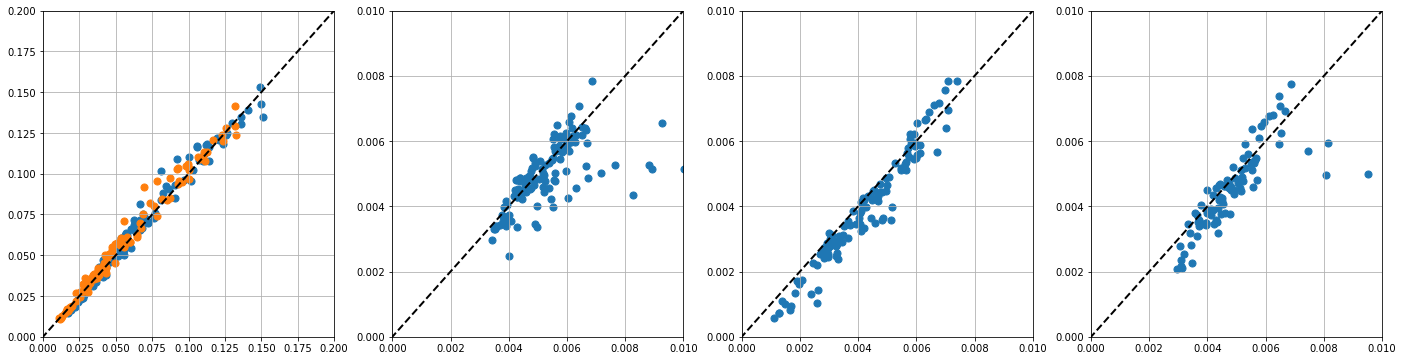

In [67]:
# band width +- 0.4 cpd

fig, ax = plt.subplots(1,1,figsize=(24,6))
lims = (-.5, .5)

ax = plt.subplot(141)
ax.scatter( E_L.sel(frequency_band='total').mean('lon_bins'), E_E.sel(frequency_band='total').mean('lon_bins'), s=50)
ax.scatter( E_L.sel(frequency_band='low').mean('lon_bins'), E_E.sel(frequency_band='low').mean('lon_bins'), s=50)
ax.grid(); ax.set_xlim(0.,0.2); ax.set_ylim(0.,0.2)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(142)
ax.scatter( E_L.sel(frequency_band='semidiurnal_0dot4').mean('lon_bins'), E_E.sel(frequency_band='semidiurnal_0dot4').mean('lon_bins'), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(143)
ax.scatter( E_L.sel(frequency_band='diurnal_0dot4').mean('lon_bins'), E_E.sel(frequency_band='diurnal_0dot4').mean('lon_bins'), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(144)
ax.scatter( E_L.sel(frequency_band='inertial_0dot4').mean('lon_bins').where(np.abs(E_L.lat_bins)>10), E_E.sel(frequency_band='inertial_0dot4').mean('lon_bins').where(np.abs(E_E.lat_bins)>10), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

## different binning

In [57]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat_lon_bands.zarr'))
E_Eulerian = (E_Eulerian.rename({'lat_bin':'lat_bins', 'lon_bin': 'lon_bins'}))
E_E = E_Eulerian.E_SSUV
E_E

<xarray.DataArray 'E_SSUV' (frequency_band: 14, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-a8c40356d724082810d252e9d0b3dff7E_SSUV, shape=(14, 359, 119), dtype=float64, chunksize=(7, 180, 60), chunktype=numpy.ndarray>
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5

In [54]:
E = p.load_diagnostic('spectra_uv_T60_mean0_lat_lon_bands.zarr')
E_L = E.E
E_L

<xarray.DataArray 'E' (frequency_band: 14, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-6fdd392cb5b38dcff01e01286977fd97E, shape=(14, 359, 119), dtype=float64, chunksize=(1, 359, 60), chunktype=numpy.ndarray>
Coordinates:
  * frequency_band  (frequency_band) object 'total' 'low' ... 'inertial_0dot4'
  * lat_bins        (lat_bins) float64 -59.5 -58.5 -57.5 ... 56.5 57.5 58.5
  * lon_bins        (lon_bins) float64 -179.5 -178.5 -177.5 ... 177.5 178.5

In [42]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_extra_T365j_dt1j_dij50'
p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])

In [49]:
# load raw spectra
ds_L = (p.load_diagnostic('spectra_uv_T60_mean0_lat.zarr')
        .rename({'E':'E_Lagrangian', 'lat_bins': 'lat'})
       )

ds_E = (xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat.zarr'))
        .rename({'E_SSUV_T60': 'E_Eulerian', 'lat_bin': 'lat'})
       )

ds = xr.merge([ds_L, ds_E])
ds = (ds.rename({'lat':'lat_bins'}))
ds

<xarray.Dataset>
Dimensions:       (frequency: 1440, lat_bins: 119)
Coordinates:
  * frequency     (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins      (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
Data variables:
    E_Lagrangian  (lat_bins, frequency) float64 dask.array<chunksize=(60, 720), meta=np.ndarray>
    E_Eulerian    (frequency, lat_bins) float64 dask.array<chunksize=(1440, 119), meta=np.ndarray>

In [50]:
E_Lagrangian = ds.E_Lagrangian
E_Eulerian = ds.E_Eulerian
df=E_Eulerian.frequency[1]-E_Eulerian.frequency[0]
# Inertial frequency
f_llc = 2.*2.*np.pi/86400. * np.sin(np.deg2rad(E_Eulerian.lat_bins))
f_cpd_llc = f_llc*86400/2./np.pi

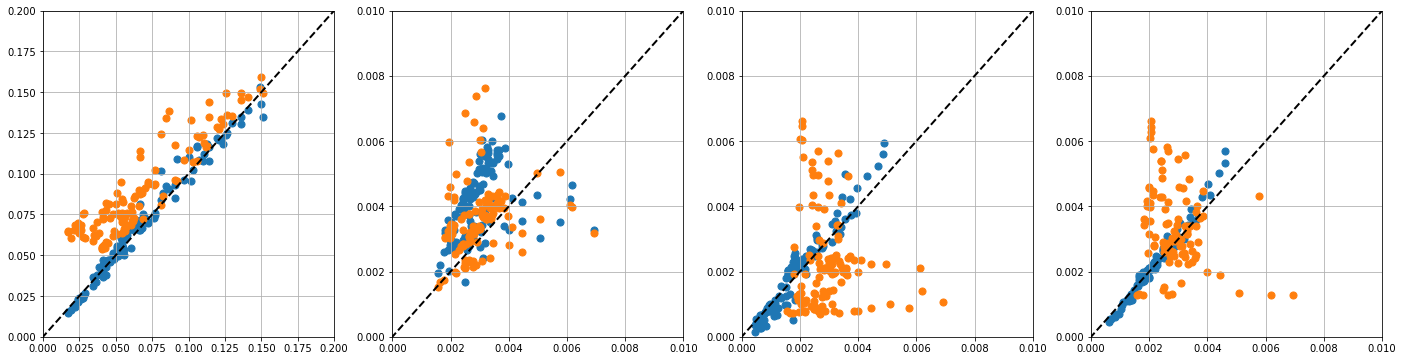

In [62]:
fig, ax = plt.subplots(1,1,figsize=(24,6))
lims = (-.5, .5)

ax = plt.subplot(141)
ax.scatter( E_L.sel(frequency_band='total').mean('lon_bins'), E_E.sel(frequency_band='total').mean('lon_bins'), s=50)
ax.scatter( E_L.sel(frequency_band='total').mean('lon_bins'), (E_Lagrangian.where((abs(E_Lagrangian.frequency)<12) , other=0.)*df).sum(dim='frequency'), s=50)
ax.grid(); ax.set_xlim(0.,0.2); ax.set_ylim(0.,0.2)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(142)
ax.scatter( E_L.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), E_E.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), s=50)
ax.scatter( E_L.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), (E_Lagrangian.where((abs(E_Lagrangian.frequency)>1.9) & (abs(E_Lagrangian.frequency)<2.1) , other=0.)*df).sum(dim='frequency'), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(143)
ax.scatter( E_L.sel(frequency_band='diurnal_0dot1').mean('lon_bins'), E_E.sel(frequency_band='diurnal_0dot1').mean('lon_bins'), s=50)
ax.scatter( E_L.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), (E_Lagrangian.where((abs(E_Lagrangian.frequency)>0.9) & (abs(E_Lagrangian.frequency)<1.1) , other=0.)*df).sum(dim='frequency'), s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)

ax = plt.subplot(144)
ax.scatter( E_L.sel(frequency_band='inertial_0dot1').mean('lon_bins').where(np.abs(E_L.lat_bins)>10), E_E.sel(frequency_band='inertial_0dot1').mean('lon_bins').where(np.abs(E_E.lat_bins)>10), s=50)
ax.scatter( E_L.sel(frequency_band='semidiurnal_0dot1').mean('lon_bins'), 
           (E_Lagrangian.where(abs(E_Lagrangian.frequency+f_cpd_llc)<.1, other=0.)*df).sum(dim='frequency').where(abs(E_Lagrangian.lat_bins)>10), 
            s=50)
ax.grid(); ax.set_xlim(0.,0.01); ax.set_ylim(0.,0.01)
ax.plot(lims, lims, color="k", ls="--", linewidth=2)


## Close cluster

In [74]:
cluster.close()